In [1]:
import tkinter
print (tkinter.TkVersion)

8.6


In [2]:
#import tkinter as tk

# create a Tkinter root window
#root = tk.Tk()

# create a label with "Hello, World!" text
#label = tk.Label(root, text="Hello, World!")

# display the label in the root window
#label.pack()

# run the main event loop
#root.mainloop()


In [3]:
#note: this requires the "pillow" package to be installed
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
# img = raw_input("Input an image to compress: \n")

In [4]:
from tkinter import Tk
from tkinter.filedialog import askopenfilename

In [5]:
#create a Tkinter root window
root = Tk()

In [6]:
#set the window to be hidden
root.withdraw()

#set the file types to be restricted to images
filetypes = (("Image files", "*.jpg;*.jpeg;*.png;*.gif"), ("All files", "*.*"))

In [7]:
#display a file dialog for the user to select an image file
filename = askopenfilename(initialdir="~", title="Select an image file", filetypes=filetypes)

import os

#print the selected file name
print("Selected file: ", filename)
windows_path = filename

# Convert Windows path to a cross-platform path
cross_platform_path = os.path.normpath(windows_path)
print(cross_platform_path)

Selected file:  C:/Users/HP/D. Science/Images/demo-image-for-compression.jpg
C:\Users\HP\D. Science\Images\demo-image-for-compression.jpg


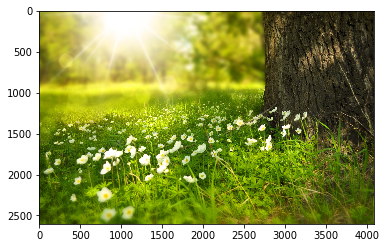

In [8]:

img = plt.imread(cross_platform_path, 0)
plt.imshow(img)

# image_path = "C:/Users/User/Documents/D. Science/Images/Trial.png"
# china = cv.imread("Trial.png")
# from IPython import display
# china = display.Image("C:/Users/User/Documents/D. Science/Images/Trial.png")

#china = load_sample_image("flower.jpg")
#china = load_sample_image("china.jpg")
# ax = plt.axes(xticks=[], yticks=[])
# ax.imshow(china);

In [9]:
#return the dimensions of the array
#img.shape
height, width, channels = img.shape;
print (height)
print (width)
print (channels)

2602
4090
3


In [10]:
#reshape the data to [n_samples x n_features], and rescale the colors so that they lie between
data = img / 255.0 #use 0.....1 scale
data = data.reshape(height * width, channels)
data.shape

(10642180, 3)

In [11]:
data

array([[0.62745098, 0.62745098, 0.14117647],
       [0.62745098, 0.62745098, 0.14117647],
       [0.62745098, 0.62745098, 0.14117647],
       ...,
       [0.24313725, 0.34509804, 0.00392157],
       [0.24705882, 0.34901961, 0.00784314],
       [0.24705882, 0.34901961, 0.00784314]])

In [12]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
        
    #choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16,6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))
    
    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))
    
    fig.suptitle(title, size=20);

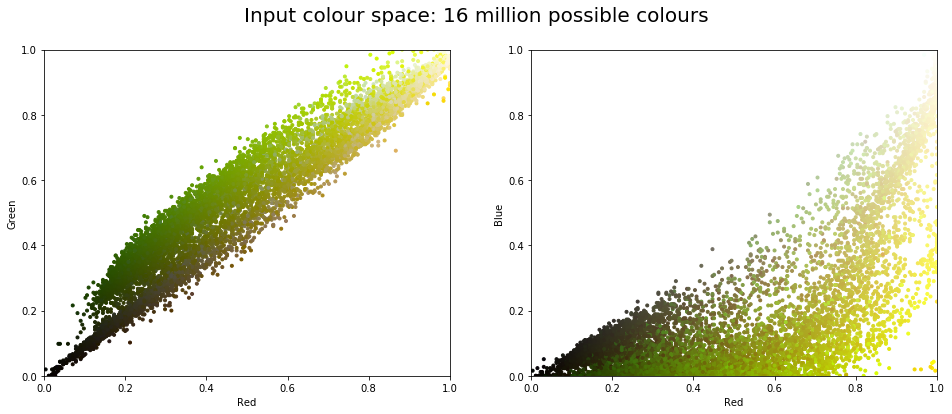

In [13]:
plot_pixels(data, title='Input colour space: 16 million possible colours')

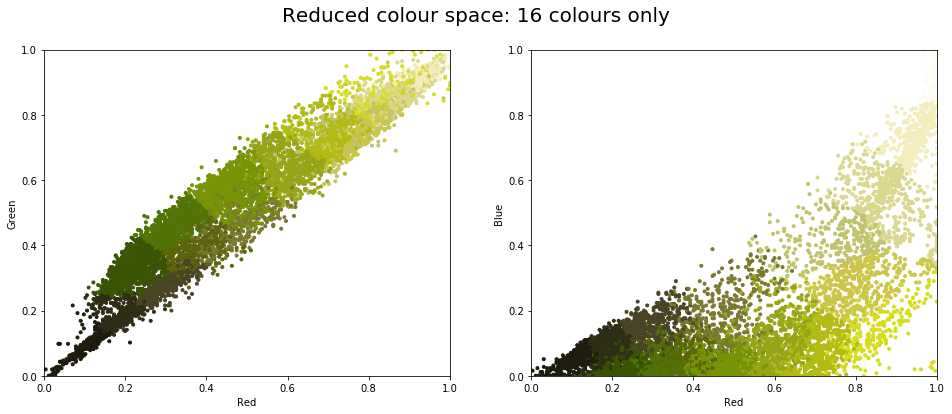

In [14]:
import warnings; warnings.simplefilter('ignore') #Fix NumPy issues

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, title='Reduced colour space: 16 colours only', colors = new_colors)

Text(0.5, 1.0, '16-color Image')

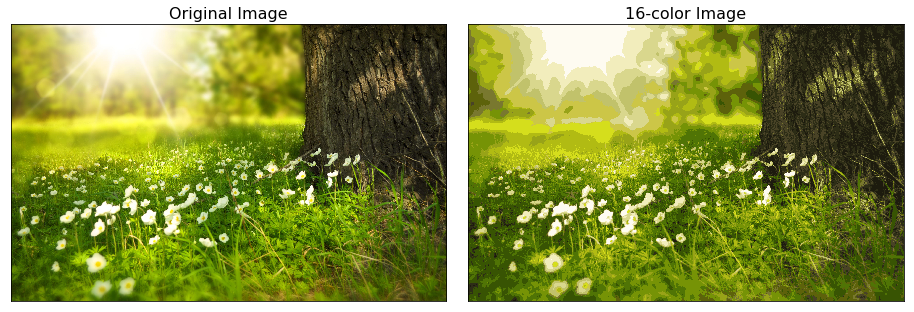

In [15]:
image_recolored = new_colors.reshape(img.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace = 0.05)
ax[0].imshow(img)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(image_recolored)
ax[1].set_title('16-color Image', size=16)